# Classification supervisée des données mixées  numériques + catégoritques
Dans ce lab, nous allons voir comment réaliser la tàche de la classification supervisée en utilisant Python + Jupyter Notebook avec les librairies sklearn et keras.


## 1. importation des librairies
Avec Pandas on peut manipuler lire et écrire nos jeux de données, généralement avec une extension .csv



In [16]:
import pandas as pd   # lire et manipuler les IO .csv
#import numpy as np   
#import matplotlib 
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split #découper l'ensemble de train et de test de maniere aléatoire
import math

# 2. Importation des données
Avec la fonction read_csv de Pandas: on peut mettre dans notre dataframe le contenu du fichier csv, en indiquant comme paramètre (1: le chemin ou la source où se trouve le fichier csv, 2: les séparateurs entre les valeurs dans notre cas ces des vergules) en troisième position, un paramètre facultatif pour spécifier le type d'encodage de notre fichier exemple encoding ="UTF8".

In [17]:
df=pd.read_csv('/home/notebooks/Amine/Bank DataSets Experimentations/base_unique.csv', sep=';')#lire le fichier csv 
df.head()  # afficher les 5 premieres lignes

,Unnamed: 0,client_id,Genre,Age,birth_number,district_id,disp_id,account_id,type_client_disp,card_id,...,nb_mun_hab_2000_9999,nb_mun_hab_10000,nb_villes,ratio_hab_urbain,salaire_moyen,chomage_1995,chomage_1996,nb_entrepreneurs_pour_1000_hab,nb_crimes_1995,nb_crimes_1996
0,0,1,Femme,26,706213,18,1,1,PROPRIETAIRE,-1.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,1,2,Homme,51,450204,1,2,2,PROPRIETAIRE,-1.0,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
2,2,3,Femme,56,406009,1,3,2,UTILISATEUR,-1.0,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
3,3,4,Homme,40,561201,5,4,3,PROPRIETAIRE,-1.0,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
4,4,5,Femme,36,605703,5,5,3,UTILISATEUR,-1.0,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


## 3. Statistiques descriptives élémentaires

Lire les informations sur nos données (Types d'attributs, valeurs manquantes...)
Pandas nous permet de voir les informations sur notre benchmark
exemple: avec dataframe.info() il nous affiche tout les attributs de notre fichier avec le type de donnée et le nombre de valeurs de chaque colonne

dataframe.columns permet de citer les noms de toutes les colonnes

In [18]:
df.info() #donner les infos de notre data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 36 columns):
Unnamed: 0                        5369 non-null int64
client_id                         5369 non-null int64
Genre                             5369 non-null object
Age                               5369 non-null int64
birth_number                      5369 non-null int64
district_id                       5369 non-null int64
disp_id                           5369 non-null int64
account_id                        5369 non-null int64
type_client_disp                  5369 non-null object
card_id                           5369 non-null float64
type_card                         5369 non-null object
issued                            5369 non-null object
district_id_account               5369 non-null int64
frequency                         5369 non-null object
date                              5369 non-null int64
loan_id                           5369 non-null float64
date_loan           

In [22]:
# fonction de transformation de colonnes categorique en numérique

from sklearn.preprocessing import LabelEncoder

def clean_data_set(data_set):
	for column in data_set.columns:
		if data_set[column].dtype == type(object):
			le = LabelEncoder()
			data_set[column] = le.fit_transform(data_set[column])

	return data_set

In [23]:
df2 = clean_data_set(df)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 36 columns):
Unnamed: 0                        5369 non-null int64
client_id                         5369 non-null int64
Genre                             5369 non-null int64
Age                               5369 non-null int64
birth_number                      5369 non-null int64
district_id                       5369 non-null int64
disp_id                           5369 non-null int64
account_id                        5369 non-null int64
type_client_disp                  5369 non-null int64
card_id                           5369 non-null float64
type_card                         5369 non-null int64
issued                            5369 non-null int64
district_id_account               5369 non-null int64
frequency                         5369 non-null int64
date                              5369 non-null int64
loan_id                           5369 non-null float64
date_loan                

In [25]:
df2.columns # citer les colonnes

Index(['Unnamed: 0', 'client_id', 'Genre', 'Age', 'birth_number',
       'district_id', 'disp_id', 'account_id', 'type_client_disp', 'card_id',
       'type_card', 'issued', 'district_id_account', 'frequency', 'date',
       'loan_id', 'date_loan', 'amount', 'duration', 'payments', 'status',
       'district_name', 'district_region', 'nb_habitants', 'nb_mun_hab_499',
       'nb_mun_hab_500_1999', 'nb_mun_hab_2000_9999', 'nb_mun_hab_10000',
       'nb_villes', 'ratio_hab_urbain', 'salaire_moyen', 'chomage_1995',
       'chomage_1996', 'nb_entrepreneurs_pour_1000_hab', 'nb_crimes_1995',
       'nb_crimes_1996'],
      dtype='object')

## 4. définir les attributs utilisés
Dans cette étape nous déterminons les attributs choisis pour l'entrainement et nous définissons l'attribut "classe" de notre benchmark

In [26]:
df_features = df2[['Unnamed: 0', 'client_id', 'Genre', 'Age',
       'birth_number', 'district_id', 'disp_id', 'account_id',
       'type_client_disp', 'card_id', 'type_card', 'issued',
       'district_id_account', 'frequency', 'date', 'loan_id', 'date_loan',
       'amount', 'duration', 'payments', #'status', 
       'district_name','district_region', 'nb_habitants', 'nb_mun_hab_499',
       'nb_mun_hab_500_1999', 'nb_mun_hab_2000_9999', 'nb_mun_hab_10000',
       'nb_villes', 'ratio_hab_urbain', 'salaire_moyen', 'chomage_1995',
       'chomage_1996', 'nb_entrepreneurs_pour_1000_hab', 'nb_crimes_1995',
       'nb_crimes_1996'
                 ]]

In [27]:
# définir l'attribut classe
df_labels = df2['status']

Si on veut schématiser la distribution de nos classes, il suffit de faire appel à la libraire seaborn, en suite définir l'attribut concerné 

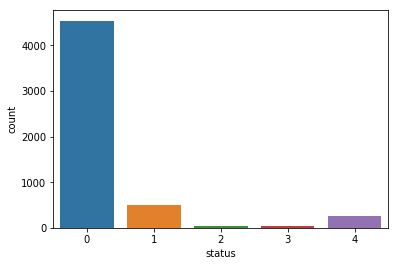

In [28]:
import seaborn as sns
# schématiser la distribution des classes
sns.countplot(df2['status'])

## 5. Diviser le dataset en données d'entrainement et données de teste
Ceci est réalisable avec sklearn qui permet de prendre aléatoirement des données de teste à partir du benchmark et laisser le reste pour l'apprentissage.
La fonction train_test_split(param1,param2,param3,param4) prends 4 paramétres:
le premier dédié à l'ensemble d'entrainement, le deuxième à l'ensemble de teste, le troisième c'est le paramètre du % de l'ensemble de test (généralement entre 15 et 40%), 

le 4 ème paramétre (facultatif) pour spécifier quel type de fonction random utiliser:
si vous utilisez random_state = some_number, vous pouvez garantir que la sortie de Run 1 sera égale à la sortie de Run 2, c'est-à-dire que votre split sera toujours le même. Peu importe ce que le nombre réel random_state est 42, 0, 21, ... L'important est que chaque fois que vous utilisez 42, vous obtiendrez toujours la même sortie la première fois que vous faites la division. Ceci est utile si vous voulez des résultats reproductibles, par exemple dans la documentation, afin que tout le monde puisse toujours voir les mêmes nombres lors de l'exécution des exemples.

Cette fonction retourne 4 sorties: 
La 1ere est le sous-ensembles aléatoires d'entrainement 
La 2éme est le vecteur de leurs labels (leurs classes).
La 3ème est le sous-ensemble aléatoire pour le teste.
La 4ème est le vecteur de leurs labels (leurs classes).


In [29]:
from sklearn.model_selection import train_test_split
#decouper le data set en 30% pour test et 70% pour train
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=42)

.shape permet de savoir la dimension d'un ensemble.
Par exemple ici l'ensemble d'entrainement est composé de 105000 lignes et 9 colonnes. 

In [30]:
print('x_train shape:', X_train.shape) # .shape permet de voir la
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (4134, 35)
x_test shape: (1235, 35)
y_train shape: (4134,)
y_test shape: (1235,)


In [53]:
X_train.shape[0]




4295

In [54]:
y_train.shape[0]

4295

## 6. Appliquer les Algorithmes de la fouille de données 
### sklearn : 
Contient la plus part des algorithmes de data mining , ici par exemple on fait appel aux algorithmes Naive Bayes , Support Vector Machines, et au KNN (algorithme des k plus proches voisins) 


In [64]:
########## DATA Mining Approaches

In [34]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
#import matplotlib.pyplot as plt 
#import itertools    #pour dessiner la matrice de confusion

In [35]:
#1 Bernouli Naive Bayes
import time
bnb= BernoulliNB()
tps1 = time.clock()
#fitting
#bnb.fit(X_train, y_train.values.ravel())
bnb.fit(X_train, y_train)


#y = ravel(a) : If a is a matrix, y is a 1-D ndarray, otherwise y is an array of the same subtype as a. 
#The shape of the returned array is (a.size,). 
#Matrices are special cased for backward compatibility.

ypredBnb = bnb.predict(X_test)
tps2 = time.clock() 
ts = tps2 - tps1
print("time = ",ts)
print ('Bernoulli accuracy score')
print (accuracy_score(y_test, ypredBnb))

time =  0.007493000000000194
Bernoulli accuracy score
0.9295546558704454


In [37]:
#3 SVMM
from sklearn.svm import LinearSVC, NuSVC, SVC

In [38]:
lsvm= LinearSVC()

tp1=time.clock()
#fitting
lsvm.fit(X_train, y_train.values.ravel())
#ypred
ypredLsvm = lsvm.predict(X_test)
tp2=time.clock()
tp=tp2-tp1
print("time =" , tp)
print ('Linear Svm accuracy score')
print (accuracy_score(y_test, ypredLsvm))

time = 0.5840170000000002
Linear Svm accuracy score
0.9368421052631579


In [39]:
# 4 KNN Uniform
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#UNIFORM KNN
knn_uni = KNeighborsClassifier(n_neighbors=13, weights = 'uniform')
#fitting
tt1=time.clock()
knn_uni.fit(X_train, y_train.values.ravel())
#ypred
ypred_knn_uni = knn_uni.predict(X_test)
tt2=time.clock()
tt=tt2 - tt1
print("time =",tt )
print ('KNN Uniform accuracy score')
print (accuracy_score(y_test, ypred_knn_uni))

time = 0.07070699999999874
KNN Uniform accuracy score
0.9506072874493927


In [41]:
# 5 KNN Distant
knn_dist = KNeighborsClassifier(n_neighbors=13, weights = 'distance')
#fitting
tt1 = time.clock()
knn_dist.fit(X_train, y_train.values.ravel())
#ypred
ypred_knn_dist = knn_dist.predict(X_test)
tt2=time.clock()
tt=tt2 - tt1
print("time =",tt )
print ('Distant accuracy score')
print (accuracy_score(y_test, ypred_knn_dist))

time = 0.06992699999999985
Distant accuracy score
0.9546558704453442
